In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

## EDA ##

- This is for exploratory data analysis. We start by reading the data into a dataframe and understanding the dataset.
    Steps:
    - read data
    - basic contents of the dataset (shape, size, values, value types, ...)
    - learning about the features, and the values
 
- NOTE: we have to datasets, 'identity' and 'transactions'. Beginning with the training dataset first

In [4]:
# path to the training data
path_train_identity = '../data/train_identity.csv'
path_train_transaction = '../data/train_transaction.csv'

# path to the test data
path_test_identity = '../data/test_identity.csv'
path_test_transaction = '../data/test_transaction.csv'

# read the train data into dataframes
train_identity_df = pd.read_csv(path_train_identity)
train_transaction_df = pd.read_csv(path_train_transaction)

# create a merged dataframe
train_df = pd.merge(train_transaction_df, train_identity_df, on='TransactionID', how='left')

# read the test data into dataframes
test_identity_df = pd.read_csv(path_test_identity)
test_transaction_df = pd.read_csv(path_test_transaction)

## Dataset Basics
- The following two cells contain:
    - the head of each dataset to get an understanding of the data we have provided
    - some basic stats about the dataset to better understand the shape and form of data we have containing:
        - shape: number of records and number of features per dataset
        - value types: the types of each features we have in the dataset

In [5]:
print('\033[1m' + 'TRAIN IDENTITY' + '\033[0m')
train_identity_df.head(10)

TRAIN IDENTITY


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
5,2987017,-5.0,61141.0,3.0,0.0,3.0,0.0,NaN,NaN,3.0,0.0,100.0,NotFound,52.0,-300.0,Found,Found,166.0,18.0,529.0,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Windows 10,chrome 62.0,24.0,1366x768,match_status:2,T,F,T,T,desktop,Windows
6,2987022,-15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NotFound,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987038,0.0,31964.0,0.0,0.0,0.0,-10.0,NaN,NaN,0.0,0.0,100.0,Found,NaN,-300.0,Found,Found,166.0,15.0,352.0,533.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Android,chrome 62.0,32.0,1920x1080,match_status:2,T,F,T,T,mobile,NaN
8,2987040,-10.0,116098.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
9,2987048,-5.0,257037.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,484.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows


In [6]:
print('\033[1m' + 'TRAIN TRANSACTION' + '\033[0m')
train_transaction_df.head(10)

TRAIN TRANSACTION


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

## Info about numeric data in the dataset / Missing Values
- we start by considering missing values
- we consider numeric data afterwards
- we do this in two steps
    - we use the describe method of pd to get info for each numeric feature (might be to much unnecessary info)
    - we use pymfe extractor

In [7]:
# print the specs of the data
print(f'Train Identity:\nNum Features: {train_identity_df.shape[1]}\nNum Records: {train_identity_df.shape[0]}')
print(f'Train Transaction:\nNum Features: {train_transaction_df.shape[1]}\nNum Records: {train_transaction_df.shape[0]}')

# print the column types
print(f'Train Identity Column Types:\n{train_identity_df.dtypes}')
print(f'Train Transaction Column Types:\n{train_transaction_df.dtypes}')

Train Identity:
Num Features: 41
Num Records: 144233
Train Transaction:
Num Features: 394
Num Records: 590540
Train Identity Column Types:
TransactionID      int64
id_01            float64
id_02            float64
id_03            float64
id_04            float64
id_05            float64
id_06            float64
id_07            float64
id_08            float64
id_09            float64
id_10            float64
id_11            float64
id_12             object
id_13            float64
id_14            float64
id_15             object
id_16             object
id_17            float64
id_18            float64
id_19            float64
id_20            float64
id_21            float64
id_22            float64
id_23             object
id_24            float64
id_25            float64
id_26            float64
id_27             object
id_28             object
id_29             object
id_30             object
id_31             object
id_32            float64
id_33             object
id_34      

In [8]:
# missing values for both datasets
print(f'Train Identity Missing Values:\n{train_identity_df.isnull().sum()}')
print(f'Train Transaction Missing Values:\n{train_transaction_df.isnull().sum()}')

Train Identity Missing Values:
TransactionID         0
id_01                 0
id_02              3361
id_03             77909
id_04             77909
id_05              7368
id_06              7368
id_07            139078
id_08            139078
id_09             69307
id_10             69307
id_11              3255
id_12                 0
id_13             16913
id_14             64189
id_15              3248
id_16             14893
id_17              4864
id_18             99120
id_19              4915
id_20              4972
id_21            139074
id_22            139064
id_23            139064
id_24            139486
id_25            139101
id_26            139070
id_27            139064
id_28              3255
id_29              3255
id_30             66668
id_31              3951
id_32             66647
id_33             70944
id_34             66428
id_35              3248
id_36              3248
id_37              3248
id_38              3248
DeviceType         3423
DeviceInf

In [9]:
# numeric data description for both datasets
print(f'Train Identity Numeric Data Description:\n{train_identity_df.describe()}')
print(f'Train Transaction Numeric Data Description:\n{train_transaction_df.describe()}')

Train Identity Numeric Data Description:
       TransactionID          id_01          id_02         id_03  \
count   1.442330e+05  144233.000000  140872.000000  66324.000000   
mean    3.236329e+06     -10.170502  174716.584708      0.060189   
std     1.788496e+05      14.347949  159651.816856      0.598231   
min     2.987004e+06    -100.000000       1.000000    -13.000000   
25%     3.077142e+06     -10.000000   67992.000000      0.000000   
50%     3.198818e+06      -5.000000  125800.500000      0.000000   
75%     3.392923e+06      -5.000000  228749.000000      0.000000   
max     3.577534e+06       0.000000  999595.000000     10.000000   

              id_04          id_05          id_06        id_07        id_08  \
count  66324.000000  136865.000000  136865.000000  5155.000000  5155.000000   
mean      -0.058938       1.615585      -6.698710    13.285354   -38.600388   
std        0.701015       5.249856      16.491104    11.384207    26.084899   
min      -28.000000     -72.00

## Data Information
- we have sparse high dimensional data
- a lot of features with a lot of empty fields
- get share of fraud to non fraud transactions in dataset
- get correlation heatmap between numerical features
- IDEA: run correlation reduction
    - ref: https://yanlinc.medium.com/how-to-do-feature-selection-dimension-reduction-883c844aaaf6
- IDEA: run pca on numerical features to reduce dimensionality

In [10]:
# some more detailed information about some columnns
print(train_identity_df['TransactionID'].isin(train_transaction_df['TransactionID']).value_counts())

print(f'Num unique transaction IDs in train identify{train_identity_df["TransactionID"].nunique()}')

print(f'Num unique transaction IDs in train transaction{train_transaction_df["TransactionID"].nunique()}')

print(f'All unique values in productCD in train transaction{train_transaction_df["ProductCD"].unique()}')

print(f'All unique values in R_emaildomain in train transaction{train_transaction_df["R_emaildomain"].unique()}')

TransactionID
True    144233
Name: count, dtype: int64
Num unique transaction IDs in train identify144233
Num unique transaction IDs in train transaction590540
All unique values in productCD in train transaction['W' 'H' 'C' 'S' 'R']
All unique values in R_emaildomain in train transaction[nan 'gmail.com' 'hotmail.com' 'outlook.com' 'anonymous.com' 'charter.net'
 'prodigy.net.mx' 'comcast.net' 'live.com.mx' 'icloud.com' 'yahoo.com'
 'aol.com' 'juno.com' 'att.net' 'verizon.net' 'yahoo.com.mx'
 'bellsouth.net' 'servicios-ta.com' 'ymail.com' 'hotmail.es' 'msn.com'
 'optonline.net' 'live.com' 'gmx.de' 'aim.com' 'mail.com' 'me.com'
 'outlook.es' 'cox.net' 'earthlink.net' 'embarqmail.com' 'web.de'
 'sbcglobal.net' 'scranton.edu' 'mac.com' 'twc.com' 'roadrunner.com'
 'yahoo.fr' 'yahoo.de' 'yahoo.es' 'frontiernet.net' 'gmail' 'live.fr'
 'q.com' 'yahoo.co.uk' 'windstream.net' 'suddenlink.net' 'hotmail.fr'
 'ptd.net' 'hotmail.de' 'frontier.com' 'cfl.rr.com' 'hotmail.co.uk'
 'netzero.com' 'netzero.

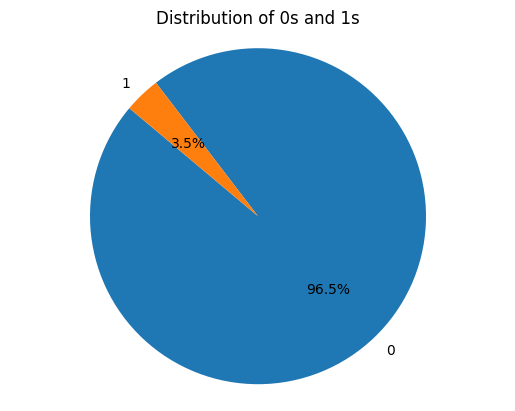

In [11]:
# Count the occurrences of 0s and 1s
count_0 = train_transaction_df['isFraud'].value_counts()[0]
count_1 = train_transaction_df['isFraud'].value_counts()[1]

# Create a pie chart
labels = ['0', '1']
sizes = [count_0, count_1]
colortypes = ['red', 'blue']

plt.pie(sizes, labels=labels , autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of 0s and 1s')
plt.show()

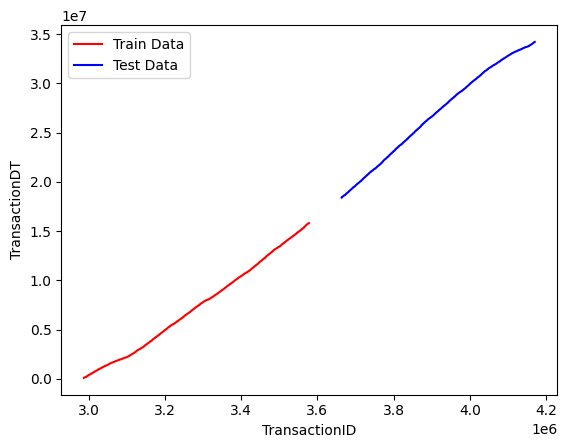

In [12]:
# inspect correlation between increasing transaction ID and increasing time

plt.plot(train_transaction_df['TransactionID'], train_transaction_df['TransactionDT'], color='red', label='Train Data')
plt.plot(test_transaction_df['TransactionID'], test_transaction_df['TransactionDT'], color='blue', label='Test Data')
plt.xlabel('TransactionID')
plt.ylabel('TransactionDT')
plt.legend()
plt.show()

## Correlation
- top 10 correlations between isFraud and numerical columns are listed below
- mainly between isFraud and the V columns
- also Heatmaps of correlation between the numerical columns themself
- C features are highly correlated to eachother
- D features are highly negative correlated to eachother
- some subgroups of V features are correlated, some are not

In [13]:
# for each column in the dataset inspect correlation with the target variable
corrs = {}
for i, col in enumerate(train_df):
    if train_df[col].dtype == 'int64' or train_df[col].dtype == 'float64':
        # caclulate the correlation between the target variable and each column
        correlation = train_df['isFraud'].corr(train_df[col])
        corrs[col] = correlation

# sort the correlations in descending order
corrs_sorted = sorted(corrs.items(), key=lambda x: abs(x[1]), reverse=True)
print(corrs)
# only keep the top 10 correlations
corrs_sorted = corrs_sorted[:10]

# print the top 10 correlations and the column names, use corrs from corrs dict because
# the list only contain the absolut values so we don't distinguish between positive and negative
# correlations
for col in corrs_sorted:
    print(f'Correlation between isFraud and {col[0]}: {corrs[col[0]]}')



{'TransactionID': 0.014165772702318018, 'isFraud': 1.0, 'TransactionDT': 0.013103054993049802, 'TransactionAmt': 0.011319825333214848, 'card1': -0.013639969873036213, 'card2': 0.003387879178270662, 'card3': 0.15415133308432777, 'card5': -0.03357955581230857, 'addr1': 0.005595762757557493, 'addr2': -0.030387147315388, 'dist1': 0.021522161350321034, 'dist2': -0.01905362329259627, 'C1': 0.030569759651239807, 'C2': 0.03722893953099837, 'C3': -0.006833173826653275, 'C4': 0.03038213630507721, 'C5': -0.03075396671325185, 'C6': 0.020908983553783986, 'C7': 0.02816029164063499, 'C8': 0.032138713158291796, 'C9': -0.03170341586419381, 'C10': 0.028395987456789867, 'C11': 0.027483734598875223, 'C12': 0.0319052817112247, 'C13': -0.01114575222904829, 'C14': 0.007920558690607865, 'D1': -0.06719305903571038, 'D2': -0.08358321970827111, 'D3': -0.046271381348851254, 'D4': -0.0672163025595118, 'D5': -0.06463762954147713, 'D6': -0.057235579033438774, 'D7': -0.12719850708196537, 'D8': -0.1426364101585, 'D9':

In [17]:
# calc the correlation matrices for the different types of features seperately
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

vs = ['V'+str(i) for i in range(1, 340)]
cs = ['C'+str(i) for i in range(1, 15)]
ds = ['D'+str(i) for i in range(1, 16)]

features = [cs, ds, vs]

corr_matrices = []
i = 0
for feature_lists in features:
    print(f'running for {i}')
    # calculate the correlation matrix for all numerical features
    corr_matrices.append(train_df[feature_lists].corr()) # NOIE: takes about 1:30 min for V features
    i += 1

print(corr_matrices)


running for 0
running for 1
running for 2
[           C1        C2        C3        C4        C5        C6        C7  \
C1   1.000000  0.995089 -0.003467  0.967800  0.165862  0.982238  0.926258   
C2   0.995089  1.000000 -0.003339  0.972134  0.126540  0.974845  0.938867   
C3  -0.003467 -0.003339  1.000000 -0.001720 -0.008101 -0.004711 -0.001730   
C4   0.967800  0.972134 -0.001720  1.000000 -0.012842  0.962319  0.895092   
C5   0.165862  0.126540 -0.008101 -0.012842  1.000000  0.232409 -0.009970   
C6   0.982238  0.974845 -0.004711  0.962319  0.232409  1.000000  0.858583   
C7   0.926258  0.938867 -0.001730  0.895092 -0.009970  0.858583  1.000000   
C8   0.967746  0.975863 -0.001203  0.959995 -0.011654  0.921972  0.982983   
C9   0.175999  0.133566 -0.010074 -0.015970  0.925786  0.250695 -0.012399   
C10  0.958202  0.970624 -0.001494  0.952466 -0.011846  0.914440  0.985062   
C11  0.996515  0.993898 -0.003583  0.974547  0.168862  0.991105  0.915209   
C12  0.927939  0.940258 -0.001763

Text(0.5, 1.0, 'Correlation Matrix for V Features')

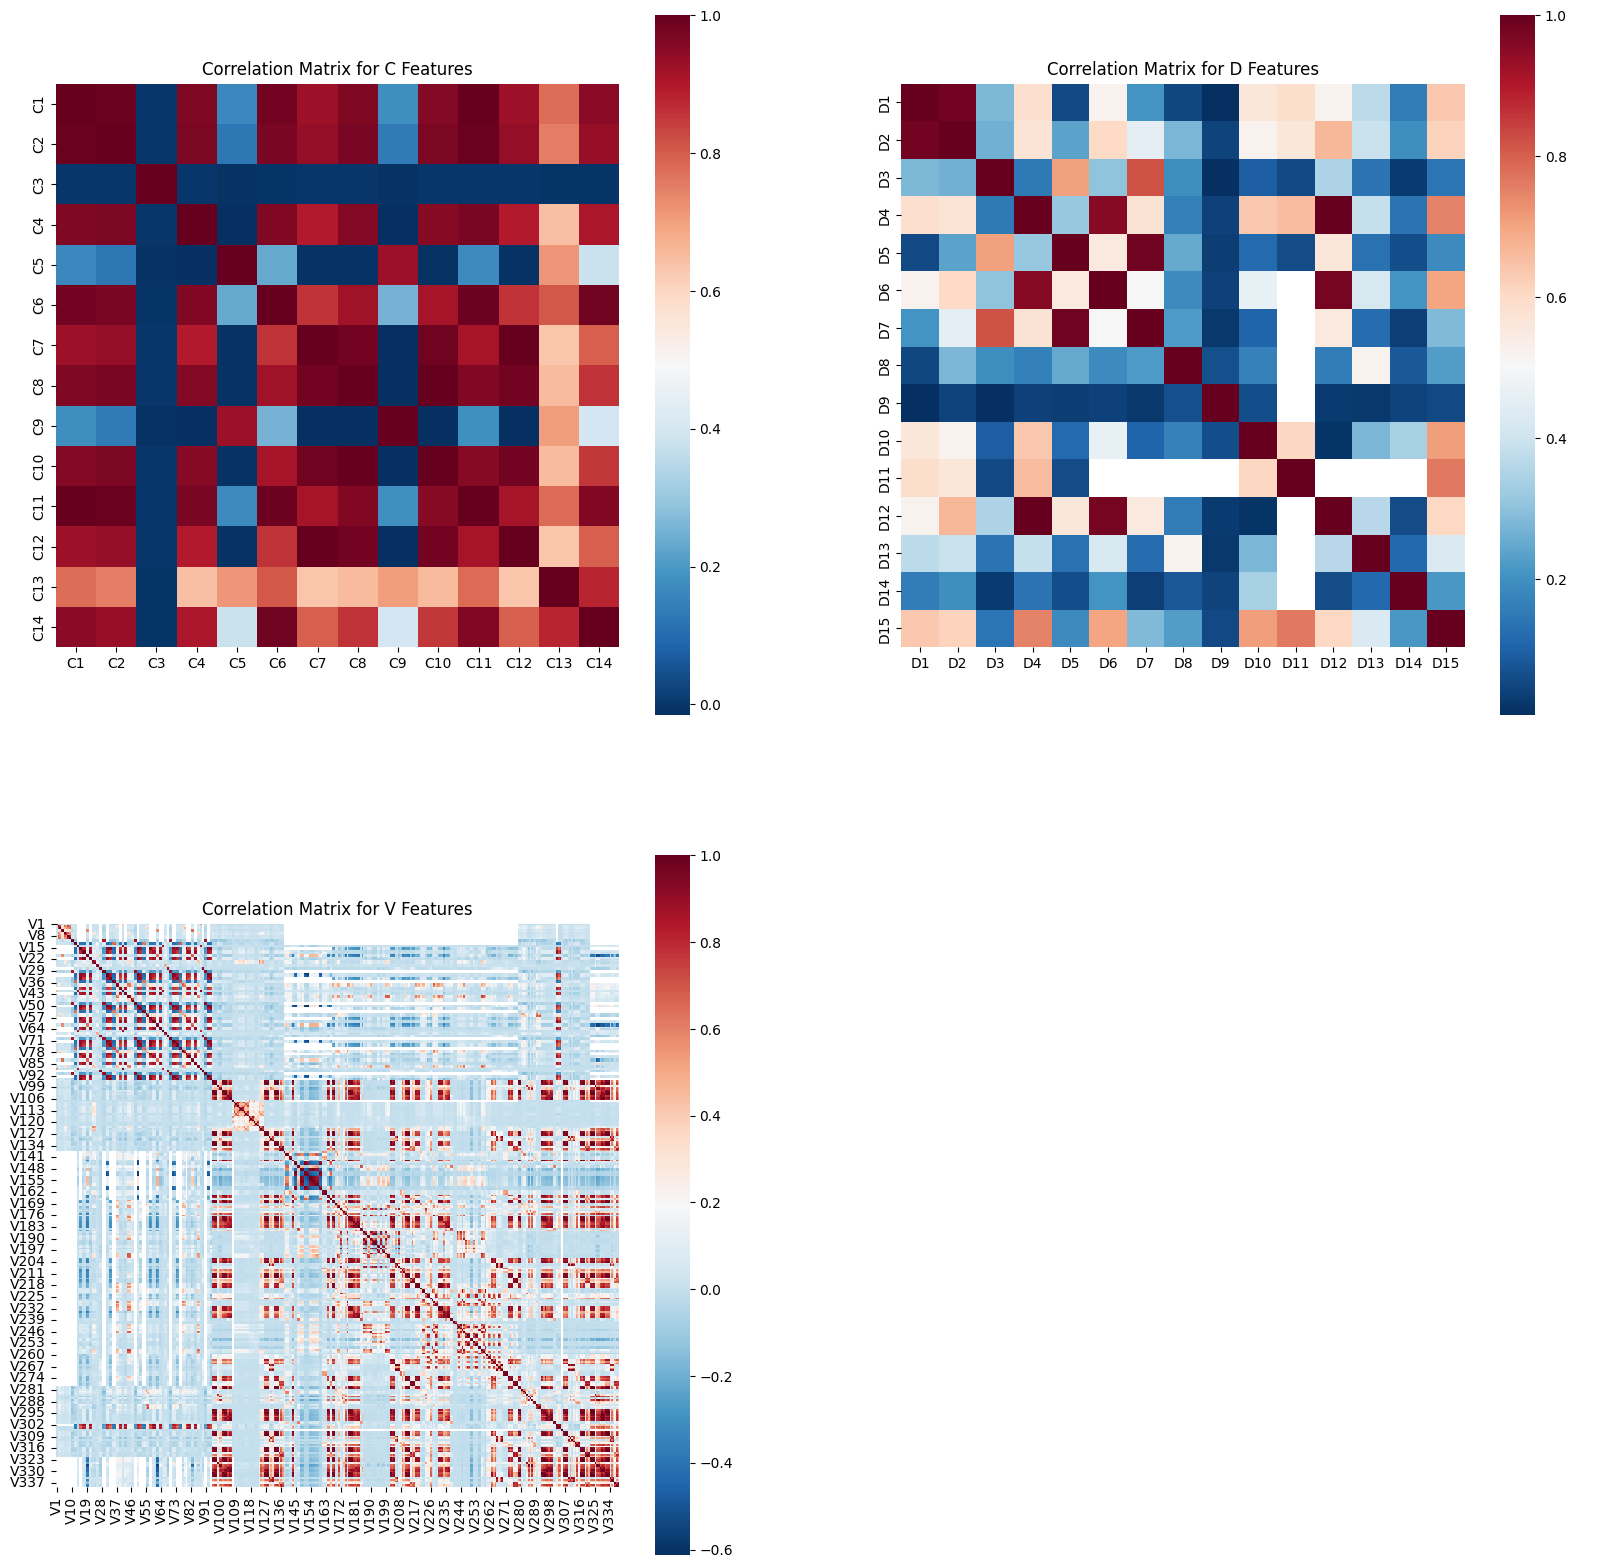

In [63]:
# plot into a heatmap
fig, ax = plt.subplots(2, 2, figsize=(20, 20))

sns.heatmap(corr_matrices[0], annot=False, fmt=".2f", cmap="RdBu_r", square=True, ax=ax[0][0])
sns.heatmap(corr_matrices[1], annot=False, fmt=".2f", cmap="RdBu_r", square=True, ax=ax[0][1])
sns.heatmap(corr_matrices[2], annot=False, fmt=".2f", cmap="RdBu_r", square=True, ax=ax[1][0])
# last subplot empty
ax[1][1].axis('off')
ax[0][0].set_title('Correlation Matrix for C Features')
ax[0][1].set_title('Correlation Matrix for D Features')
ax[1][0].set_title('Correlation Matrix for V Features')

In [ ]:
# TODO: reduce the dimensionality of the data (PCA)
# TODO: create a joined dataset of train and test containing the relevant columns (also pca columns may replace highly correlated columns)
# no decision boundaries plot -> can't really break down the data into 2 dimensions
